In [18]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

def preprocess_data(df):
    # Создаем копию данных
    df_processed = df.copy()
    
    # Удаляем ненужные столбцы
    columns_to_drop = ['Unnamed: 0', 'id', 'Blood sugar', 'CK-MB', 'Troponin']
    df_processed = df_processed.drop(columns=columns_to_drop)
    
    # Кодируем категориальные переменные
    le = LabelEncoder()
    df_processed['Gender'] = le.fit_transform(df_processed['Gender'])
    
    # Разделяем данные на числовые и категориальные признаки
    numeric_features = df_processed.select_dtypes(include=[np.number]).columns.tolist()
    numeric_features.remove('Heart Attack Risk (Binary)')  # Исключаем целевую переменную
    
    # Заполняем пропущенные значения
    imputer = SimpleImputer(strategy='median')
    df_processed[numeric_features] = imputer.fit_transform(df_processed[numeric_features])
    
    # Нормализуем числовые признаки
    scaler = StandardScaler()
    df_processed[numeric_features] = scaler.fit_transform(df_processed[numeric_features])
    
    return df_processed

if __name__ == "__main__":
    # Загрузка данных
    df = pd.read_csv('C:/Users/Pc4/Documents/GitHub/Hearts/heart_attack_risk_prediction/data/heart_train.csv')
    
    # Предобработка
    df_processed = preprocess_data(df)
    
    # Сохранение обработанных данных
    df_processed.to_csv('C:/Users/Pc4/Documents/GitHub/Hearts/heart_attack_risk_prediction/data/heart_train_processed.csv', index=False)
    
    print(f"Обработанные данные сохранены. Размер: {df_processed.shape}")
    print("Первые 5 строк обработанных данных:")
    print(df_processed.head())

Обработанные данные сохранены. Размер: (8685, 23)
Первые 5 строк обработанных данных:
        Age  Cholesterol  Heart rate  Diabetes  Family History   Smoking  \
0 -0.391103     0.811636    1.005731  0.714815        1.049466  0.322892   
1 -1.071595    -0.618443   -0.127706  0.714815        1.049466 -3.097009   
2  0.678242     1.263239    0.224050  0.714815       -0.952865  0.322892   
3  1.212915    -1.734907    0.106798 -1.398964       -0.952865  0.322892   
4  1.407341     0.899448   -1.222059 -1.398964       -0.952865  0.322892   

    Obesity  Alcohol Consumption  Exercise Hours Per Week      Diet  ...  \
0  1.031706             0.794346                 0.112807 -0.066300  ...   
1 -0.969269             0.794346                -1.526325  1.087641  ...   
2  1.031706             0.794346                 1.547163  1.087641  ...   
3 -0.969269             0.794346                 0.679948 -1.220241  ...   
4 -0.969269             0.794346                -0.317773 -0.066300  ...   



In [20]:
# Сохраним обработанные данные в файл
df_processed.to_csv('C:/Users/Pc4/Documents/GitHub/Hearts/heart_attack_risk_prediction/data/processed_heart_train.csv', index=False)
print("Обработанные данные сохранены в processed_heart_train.csv")

Обработанные данные сохранены в processed_heart_train.csv


In [21]:
from sklearn.model_selection import train_test_split

# Разделяем данные
X = df_processed.drop('Heart Attack Risk (Binary)', axis=1)
y = df_processed['Heart Attack Risk (Binary)']

# Разделяем на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Размеры выборок: Train {X_train.shape}, Test {X_test.shape}")

Размеры выборок: Train (6948, 22), Test (1737, 22)


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Создаем и обучаем модель
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Предсказываем на тестовых данных
y_pred = model.predict(X_test)

# Оцениваем модель
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6741508347725964

Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.98      0.80      1134
         1.0       0.71      0.10      0.18       603

    accuracy                           0.67      1737
   macro avg       0.69      0.54      0.49      1737
weighted avg       0.68      0.67      0.58      1737



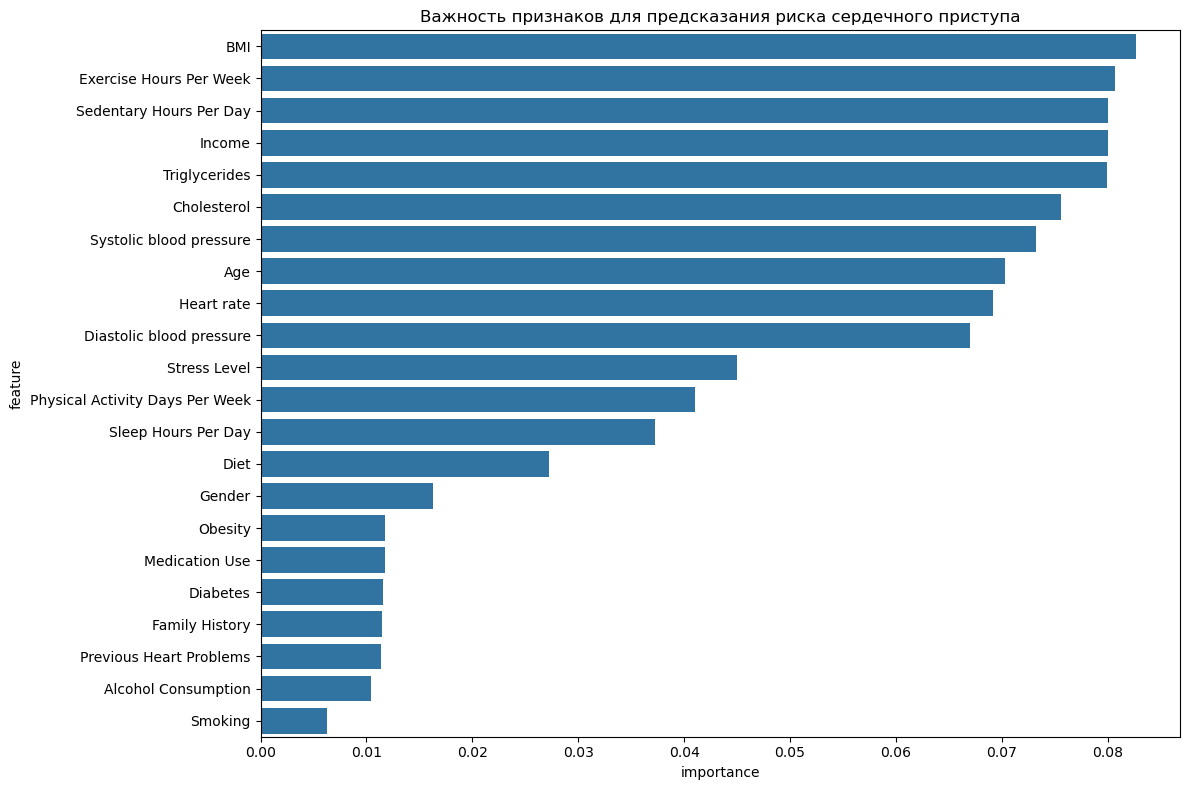

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Получаем важность признаков
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

# Визуализируем
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Важность признаков для предсказания риска сердечного приступа')
plt.tight_layout()
plt.savefig('C:/Users/Pc4/Documents/GitHub/Hearts/heart_attack_risk_prediction/images/feature_importance.png')  # Сохраняем для отчета
plt.show()

In [28]:
# Создаем простой текстовый отчет о результатах
with open('C:/Users/Pc4/Documents/GitHub/Hearts/heart_attack_risk_prediction/reports/model_report.txt', 'w') as f:
    f.write("Отчет по модели предсказания риска сердечного приступа\n")
    f.write("="*50 + "\n")
    f.write(f"Дата: {pd.Timestamp.now()}\n")
    f.write(f"Размер dataset: {df_processed.shape}\n")
    f.write(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
    f.write("\nВажность признаков:\n")
    for i, row in feature_importance.iterrows():
        f.write(f"{row['feature']}: {row['importance']:.4f}\n")